In [3]:
import numpy as np
french_file = open("french.txt", encoding="utf8")
german_file = open("german.txt" )
english_file = open("english.txt")

In [4]:
french_lines = french_file.readlines()
german_lines = german_file.readlines()
english_lines = english_file.readlines()

def readlines(lines, label): 
    data = []
    for line in lines:
        line = line.replace('\n', '')

        if len(line) == 5:
            data.append([ord(char) for char in line] + [label])
    return data

french_data = readlines(french_lines, 0)
german_data = readlines(german_lines, 1)
english_data = readlines(english_lines, 2)

In [5]:
data = np.concatenate([french_data, german_data, english_data])
print(data)

[[ 97  98  97 116 115   0]
 [ 97  98  98 233 115   0]
 [ 97  98  99 232 115   0]
 ...
 [122 121 103 111 110   2]
 [122 121 109 101 115   2]
 [122 121 109 105  99   2]]


In [6]:
from sklearn.model_selection import train_test_split
X = data[:,:-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()


In [8]:
knn_model.fit(X_train ,y_train)
svm_model.fit(X_train ,y_train)
mlp_nn.fit(X_train ,y_train)

MLPClassifier()

In [9]:
knn = (knn_model.predict(X_test)) 
svm = (svm_model.predict(X_test)) 
mlp =(mlp_nn.predict(X_test)) 
print("Model Predictions")
print("KNN = ", knn)
print("SVM = ", svm)
print("MLP = ", mlp) #fixed


Model Predictions
KNN =  [2 0 2 ... 2 2 2]
SVM =  [2 2 2 ... 2 2 2]
MLP =  [2 2 2 ... 2 2 2]


In [10]:
from sklearn.metrics import accuracy_score
knn1 = accuracy_score(y_test, knn)
svm1 = accuracy_score(y_test, svm)
mpl1 = accuracy_score(y_test, mlp) #fixed
print("Model Accuracy")
print("KNN =", knn1*100)
print("svm =", svm1*100)
print("mlp =", mpl1*100)

Model Accuracy
KNN = 73.6986301369863
svm = 76.08219178082192
mlp = 76.05479452054794


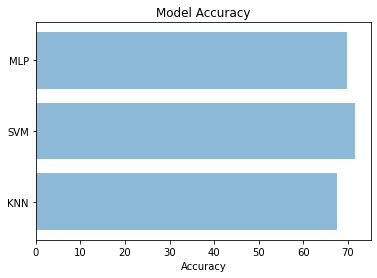

In [11]:
### import numpy as np
import matplotlib.pyplot as plt

# Label text for each graph
labels = ("KNN", "SVM", "MLP")

# Numbers that you want the bars to represent
value = [67.58, 71.58, 69.77]

# Title of the plot
plt.title("Model Accuracy")

# Label for the x values of the bar graph
plt.xlabel("Accuracy")

# Drawing the bar graph
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align="center", alpha=0.5)
plt.yticks(y_pos, labels)

# Display the graph
plt.show()